In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Let's Create synthitic data points
from sklearn.datasets import make_regression


In [3]:
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
x

array([[-1.23209916,  0.56168813],
       [-0.87935392,  0.29381234],
       [-0.63441709,  0.74937685],
       ...,
       [-0.54586937, -0.04869486],
       [-0.09821225, -0.33499925],
       [ 0.8423164 , -0.1864452 ]])

In [5]:
y

array([-1.11212586e+02, -7.45351115e+01, -5.00367384e+01,  8.36217750e+00,
       -9.97436281e+01, -1.97923397e+01,  3.84983346e+01,  9.43677691e+01,
        1.27560659e+02, -7.40570454e+01,  1.46235956e+02, -1.07610981e+02,
        1.97385136e+01, -4.29579958e+01, -2.44814796e+02, -6.00980303e+01,
       -1.91112376e+01,  1.98610263e+02, -1.80636533e+01,  7.45504357e+01,
       -1.48606766e+02,  4.75881176e+00, -1.28620951e+02,  3.53229496e+01,
       -1.90275388e+02, -4.17257984e+01,  8.93831723e+01,  4.60345209e+01,
       -1.35021688e+02,  6.19800000e+01, -9.82185795e+01,  1.44031553e+02,
       -2.83912435e+02, -1.33306685e+01,  4.56755471e+01, -1.07182113e+02,
       -3.33942612e+01, -6.59683299e+00,  4.87505113e+01, -2.38873313e+00,
       -1.27017984e+02, -6.86373303e+01, -6.43046577e+01,  5.97454271e+01,
       -3.95204801e+01,  3.58708451e+01, -1.15180127e+02,  1.18817886e+02,
        1.16898079e+01, -4.73063464e+01,  6.90709819e+01, -4.86120695e+01,
       -1.00297409e+02,  

In [6]:
pd.DataFrame(x)[0]

0     -1.232099
1     -0.879354
2     -0.634417
3      0.095879
4     -1.231757
         ...   
995    0.034466
996    1.725315
997   -0.545869
998   -0.098212
999    0.842316
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

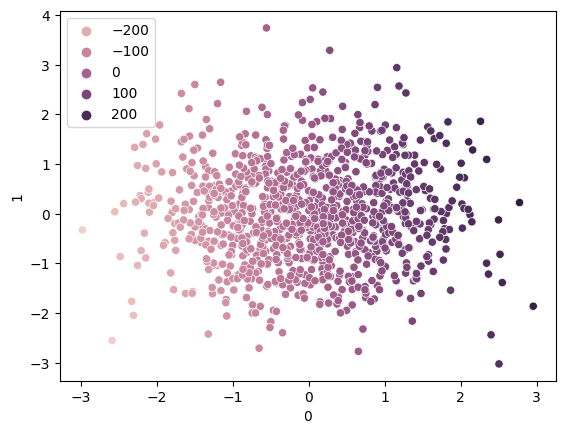

In [7]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[93.09617423, 15.98527103]])

In [13]:
## prediction
y_pred=svr.predict(x_test)

In [14]:
y_pred

array([  66.98813235,  -92.11670436,  125.05162018,  114.35983729,
         56.4873268 ,   32.45741514,  -95.20885217,   -3.32866129,
       -111.28931968,   96.69377714,  104.98772009,  100.90333459,
         18.16643291,  156.09296257,   57.89564512,  139.40937478,
        -89.36157412,   40.44349464,  -69.80015407, -226.41175095,
         59.71027522,   41.71212442, -213.9668403 ,  -24.80709593,
        -62.76332648,  -23.33169462,  -70.98110726,  137.86470619,
          6.33602562,  -14.014234  ,   71.24727981,   81.17462041,
        -38.17080627,  -49.08681245, -114.91636915, -136.19925384,
         58.53791925,    4.06037704,   36.28371448,  -37.99385363,
       -104.91034079,   72.43478272,   54.61202303,   56.46272881,
       -120.8035233 ,  -94.3310373 ,   60.48427912,   51.70861702,
         92.08661393,   -1.60141853,   45.46093931,   10.05998449,
         87.33245131, -164.73858216, -112.8971182 ,  -22.4673663 ,
       -143.63754946,   73.67038686,  118.53732148, -126.69956

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9990611374693061


## Hyperparameter tunning with SVR


In [17]:
from sklearn.model_selection import GridSearchCV

#defining the paramter range
param_grid={'C':[0.1,1,10,100,1000],
            'gama':[1,0.1,0.01,0.001,0.0001],
            'kernel':['linear'],
            'epsilon':[0.1,0.2,0.3]
            
    
}

In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


ValueError: Invalid parameter 'gama' for estimator SVR(C=0.1). Valid parameters are: ['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'].

In [21]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [20]:
# prediction
y_pred4=grid.predict(x_test)


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.